In [1]:
import os
import pandas as pd 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from joblib import dump
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
for dirname, _, filenames in os.walk('.\dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\dataset\consumable\alternaria_013.jpg
.\dataset\consumable\alternaria_014.jpg
.\dataset\consumable\alternaria_032.jpg
.\dataset\consumable\alternaria_040.jpg
.\dataset\consumable\alternaria_045.jpg
.\dataset\consumable\alternaria_046.jpg
.\dataset\consumable\alternaria_056.jpg
.\dataset\consumable\alternaria_058.jpg
.\dataset\consumable\alternaria_069.jpg
.\dataset\consumable\alternaria_122.jpg
.\dataset\consumable\anthracnose_002.jpg
.\dataset\consumable\anthracnose_018.jpg
.\dataset\consumable\anthracnose_026.jpg
.\dataset\consumable\anthracnose_040.jpg
.\dataset\consumable\anthracnose_044.jpg
.\dataset\consumable\anthracnose_054.jpg
.\dataset\consumable\anthracnose_092.jpg
.\dataset\consumable\anthracnose_103.jpg
.\dataset\consumable\anthracnose_117.jpg
.\dataset\consumable\anthracnose_121.jpg
.\dataset\consumable\anthracnose_123.jpg
.\dataset\consumable\anthracnose_124.jpg
.\dataset\consumable\anthracnose_126.jpg
.\dataset\consumable\healthy_001.jpg
.\dataset\consumable\healthy_0

In [5]:
# Directory with our training healthy pictures
a_dir = os.path.join('./dataset/consumable')

# Directory with our training not healthy pictures
b_dir = os.path.join('./dataset/not consumable')

In [6]:
a_names = os.listdir(a_dir)
print(a_names[:10])
b_names = os.listdir(b_dir)
print(b_names[:10])

['alternaria_013.jpg', 'alternaria_014.jpg', 'alternaria_032.jpg', 'alternaria_040.jpg', 'alternaria_045.jpg', 'alternaria_046.jpg', 'alternaria_056.jpg', 'alternaria_058.jpg', 'alternaria_069.jpg', 'alternaria_122.jpg']
['alternaria_001.jpg', 'alternaria_002.jpg', 'alternaria_003.jpg', 'alternaria_004.jpg', 'alternaria_005.jpg', 'alternaria_006.jpg', 'alternaria_007.jpg', 'alternaria_008.jpg', 'alternaria_009.jpg', 'alternaria_010.jpg']


In [7]:
print('total healthy images:', len(os.listdir(a_dir)))
print('total non-healthy images:', len(os.listdir(b_dir)))

total healthy images: 261
total non-healthy images: 670


In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 10
ncols = 2

# Index for iterating over images
pic_index = 0

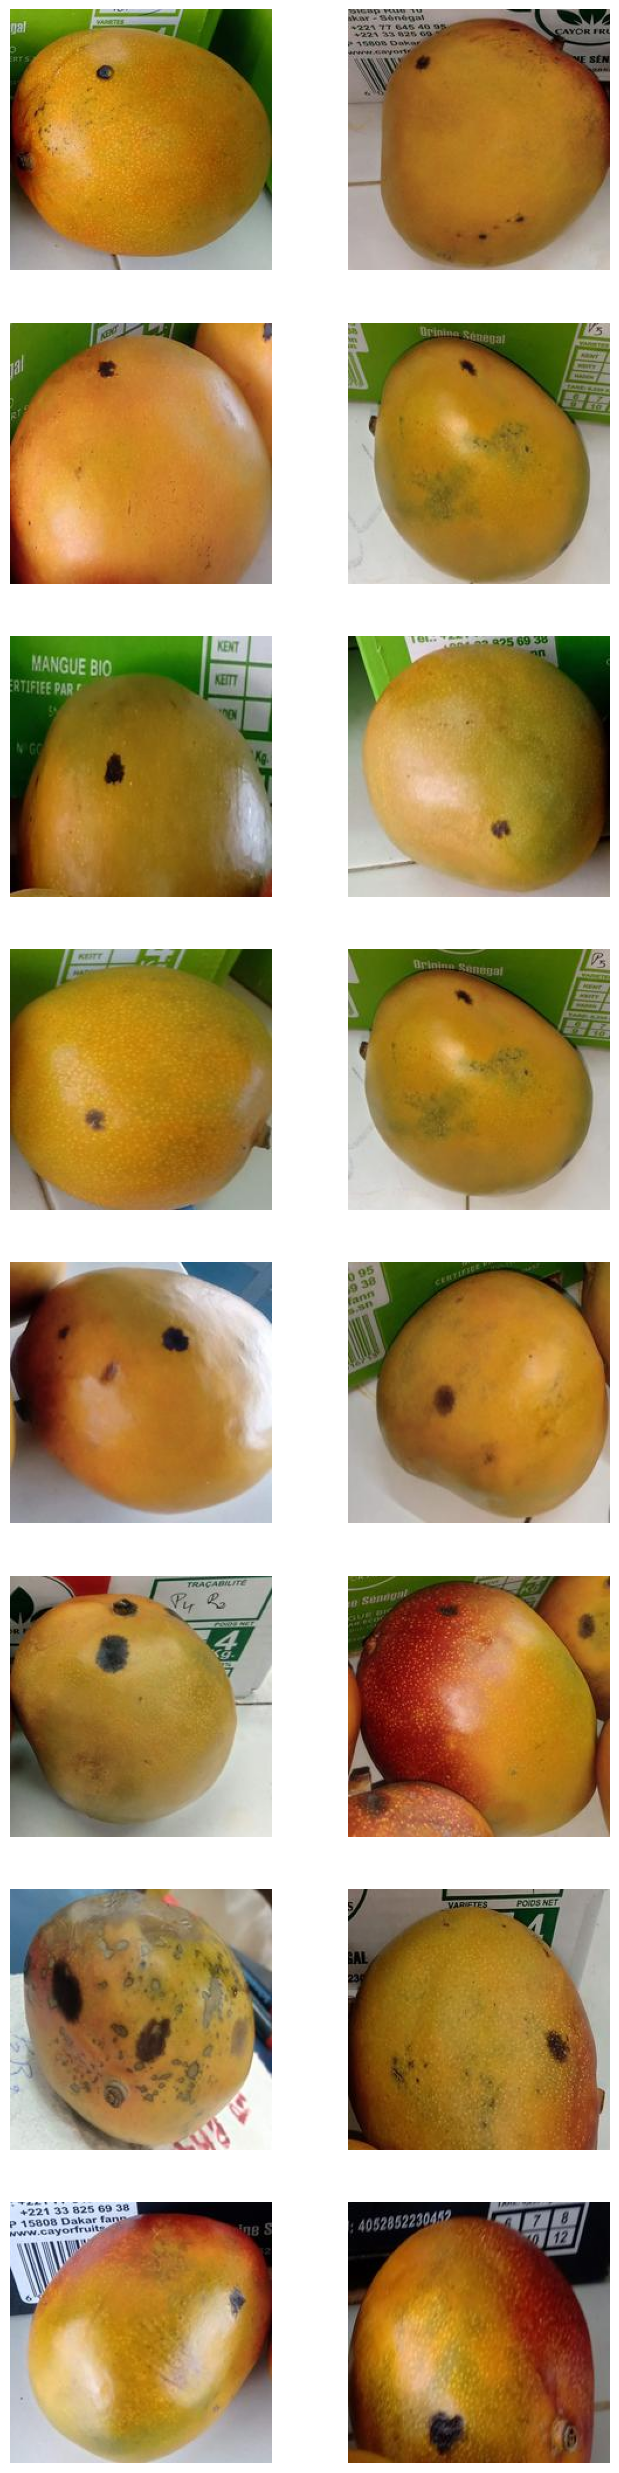

In [9]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
a_pix = [os.path.join(a_dir, fname)
                for fname in a_names[pic_index-8:pic_index]]
b_pix = [os.path.join(b_dir, fname)
                for fname in b_names[pic_index-8:pic_index]]

for i, img_path in enumerate(a_pix + b_pix):
  sp = plt.subplot(nrows, ncols, (i % (nrows * ncols)) + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

In [10]:
data_dir = './dataset'
batch_size = 64
epochs = 30
input_shape = (300, 300, 3)
image_paths = []
labels = []

for category in os.listdir(data_dir):
    category_dir = os.path.join(data_dir, category)
    if os.path.isdir(category_dir):
        for image_filename in os.listdir(category_dir):
            if image_filename.endswith('.jpg'):
                image_path = os.path.join(category_dir, image_filename)
                image_paths.append(image_path)
                labels.append(category)
train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

In [11]:
len(train_image_paths),len(test_image_paths), len(train_labels), len(test_labels)

(739, 185, 739, 185)

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [19]:
# Create a label encoder
label_encoder = LabelEncoder()

# Fit the encoder with your labels
# Assuming `labels` is your list of labels
label_encoder.fit(labels)

# Save the encoder
dump(label_encoder, 'label_encoder.joblib')

['label_encoder.joblib']

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [24]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_dataframe(
    pd.DataFrame({'image_path': train_image_paths, 'label': train_labels}),
    x_col='image_path',
    y_col='label',
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_dataframe(
    pd.DataFrame({'image_path': test_image_paths, 'label': test_labels}),
    x_col='image_path',
    y_col='label',
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical'
)

Found 739 validated image filenames belonging to 2 classes.
Found 185 validated image filenames belonging to 2 classes.


In [25]:
history = model.fit(train_generator, epochs=30, steps_per_epoch=8, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/30
8/8 [==============================] - 13s 2s/step - loss: 0.6542 - accuracy: 0.6543 - val_loss: 0.5831 - val_accuracy: 0.7351
Epoch 2/30
8/8 [==============================] - 9s 1s/step - loss: 0.6374 - accuracy: 0.7031 - val_loss: 0.6408 - val_accuracy: 0.7351
Epoch 3/30
8/8 [==============================] - 8s 1s/step - loss: 0.5870 - accuracy: 0.7267 - val_loss: 0.5643 - val_accuracy: 0.7351
Epoch 4/30
8/8 [==============================] - 9s 1s/step - loss: 0.5897 - accuracy: 0.7148 - val_loss: 0.5416 - val_accuracy: 0.7351
Epoch 5/30
8/8 [==============================] - 9s 1s/step - loss: 0.6172 - accuracy: 0.6270 - val_loss: 0.6492 - val_accuracy: 0.7351
Epoch 6/30
8/8 [==============================] - 12s 2s/step - loss: 0.5965 - accuracy: 0.7051 - val_loss: 0.7629 - val_accuracy: 0.7351
Epoch 7/30
8/8 [==============================] - 11s 1s/step - loss: 0.6025 - accuracy: 0.7246 - val_loss: 0.4584 - val_accuracy: 0.7514
Epoch 8/30
8/8 [======================

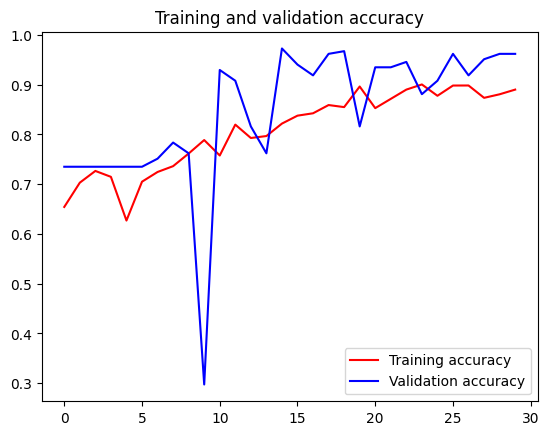

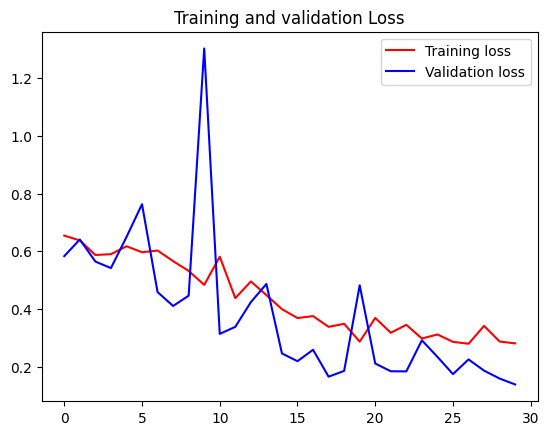

<Figure size 640x480 with 0 Axes>

In [26]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
model.save('new_mango.h5')